In [3]:
import os
import pandas as pd
import numpy as np
from sklearn import neighbors
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import statsmodels.api as sm
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import scipy
#import plotly.plotly as py1
from scipy.stats import linregress
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from pylab import *
import statsmodels
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
import statistics
import csv
from sklearn.preprocessing import Imputer
import researchpy as rp
import statsmodels.formula.api as smf
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import datasets, linear_model

In [4]:
os.chdir('C:/Users/SAYAN/Desktop/Data Science/Projects/Bike Rental Count/Python Folder')

In [5]:
os.getcwd()

'C:\\Users\\SAYAN\\Desktop\\Data Science\\Projects\\Bike Rental Count\\Python Folder'

In [6]:
%config IPCompleter.greedy=True

In [7]:
data = pd.read_csv('Bike_Rental_Count_data.csv')

In [8]:
data.head(8)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959


In [9]:
%matplotlib inline

In [11]:
#(data['hum']).dtype
#data['yr'] = pd.Categorical(data['yr'])
#(data['yr']).dtype
#num

In [12]:
data1 = data

In [13]:
data1 = data1.drop(['instant'], axis=1)

In [14]:
type(data1)

pandas.core.frame.DataFrame

In [15]:
import datetime
x=[]
yr=[]
mon=[]
day=[]
for i in range(0, len(data1['dteday'])):
    x.append((data1['dteday'])[i].split("-"))
    #print(x)
#print(x)
for j in range(0, len(x)):
    yr.append(x[j][0])
    mon.append(x[j][1])
    day.append(x[j][2])

for i in range(0,len(yr)):
    yr[i] = int(yr[i])
    
for i in range(0,len(mon)):
    mon[i] = int(mon[i])
    
for i in range(0,len(day)):
    day[i] = int(day[i])

days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dteday_days=[]
for i in range(0, len(yr)):
    #wd.append(datetime.datetime(yr[i],mon[i],day[i]).weekday())
    dteday_days.append(days[datetime.datetime(yr[i],mon[i],day[i]).weekday()])  #Monday is 0, Tuesday 1 and so on
    
for i in range(0,len(data1['dteday'])):
    data1['dteday'] = data1['dteday'].replace(data1['dteday'][i],dteday_days[i])

In [16]:
#mapping "dteday" with "weekday"
#In "weekday", Sunday is 0, Monday is 1 and so on, whereas in "dteday", Monday is 0, Tuesday is 1 and so on
data1['dteday'] = data1['dteday'].replace('Sunday','0')
data1['dteday'] = data1['dteday'].replace('Monday','1')
data1['dteday'] = data1['dteday'].replace('Tuesday','2')
data1['dteday'] = data1['dteday'].replace('Wednesday','3')
data1['dteday'] = data1['dteday'].replace('Thursday','4')
data1['dteday'] = data1['dteday'].replace('Friday','5')
data1['dteday'] = data1['dteday'].replace('Saturday','6')

In [17]:
#Since "dteday" and "weekday" variables carry same information, let's drop any one of them, say "dteday"
data1 = data1.drop(['dteday'], axis = 1)

In [18]:
data1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in cat_cols:
    data1[i] = pd.Categorical(data1[i])

In [20]:
#missing value analysis

data1.isna().sum(axis=0)  #no missing values and hence missing value analysis not needed
data1.isnull().sum(axis=0) #no missing values and hence missing value analysis not needed

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [21]:
#outlier analysis for numeric variables

q75_1,q25_1 = np.percentile(data1['temp'],[75,25])
iqr1 = q75_1-q25_1 # calculate the IQR (Inter Quartile Range)
lower1 = q25_1-(1.5*iqr1)
upper1 = q75_1+(1.5*iqr1)

data1['temp'][data1[data1.loc[:,'temp']<lower1].index]=np.nan
data1['temp'][data1[data1.loc[:,'temp']>upper1].index]=np.nan



q75_2,q25_2 = np.percentile(data1['atemp'],[75,25])
iqr2 = q75_2-q25_2 # calculate the IQR (Inter Quartile Range)
lower2 = q25_2-(1.5*iqr2)
upper2 = q75_2+(1.5*iqr2)

data1['atemp'][data1[data1.loc[:,'atemp']<lower2].index]=np.nan
data1['atemp'][data1[data1.loc[:,'atemp']>upper2].index]=np.nan


q75_3,q25_3 = np.percentile(data1['hum'],[75,25])
iqr3 = q75_3-q25_3 # calculate the IQR (Inter Quartile Range)
lower3 = q25_3-(1.5*iqr3)
upper3 = q75_3+(1.5*iqr3)

data1['hum'][data1[data1.loc[:,'hum']<lower3].index]=np.nan
data1['hum'][data1[data1.loc[:,'hum']>upper3].index]=np.nan


q75_4,q25_4 = np.percentile(data1['windspeed'],[75,25])
iqr4 = q75_4-q25_4 # calculate the IQR (Inter Quartile Range)
lower4 = q25_4-(1.5*iqr4)
upper4 = q75_4+(1.5*iqr4)

data1['windspeed'][data1[data1.loc[:,'windspeed']<lower4].index]=np.nan
data1['windspeed'][data1[data1.loc[:,'windspeed']>upper4].index]=np.nan


q75_5,q25_5 = np.percentile(data1['casual'],[75,25])
iqr5 = q75_5-q25_5 # calculate the IQR (Inter Quartile Range)
lower5 = q25_5-(1.5*iqr5)
upper5 = q75_5+(1.5*iqr5)

data1['casual'][data1[data1.loc[:,'casual']<lower5].index]=np.nan=np.nan
data1['casual'][data1[data1.loc[:,'casual']>upper5].index]=np.nan=np.nan


q75_6,q25_6 = np.percentile(data1['registered'],[75,25])
iqr6 = q75_6-q25_6 # calculate the IQR (Inter Quartile Range)
lower6 = q25_6-(1.5*iqr6)
upper6 = q75_6+(1.5*iqr6)

data1['registered'][data1[data1.loc[:,'registered']<lower6].index]=np.nan
data1['registered'][data1[data1.loc[:,'registered']>upper6].index]=np.nan


C:\Users\SAYAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\SAYAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\SAYAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\SAYAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set

In [20]:
data1.isna().sum(axis=0)

season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual        44
registered     0
cnt            0
dtype: int64

In [21]:
#replacing NA values from outliers

data1['hum'] = data1['hum'].fillna(data1['hum'].mean())
data1['windspeed'] = data1['windspeed'].fillna(data1['windspeed'].mean())
data1['casual'] = data1['casual'].fillna(data1['casual'].median())

In [22]:
data1.isna().sum(axis=0)

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [23]:
#modifying "cnt" variable after outlier analysis

for i in range(0, len(data1['cnt'])):
    data1['cnt'][i] = data1['casual'][i] + data1['registered'][i]

C:\Users\SAYAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


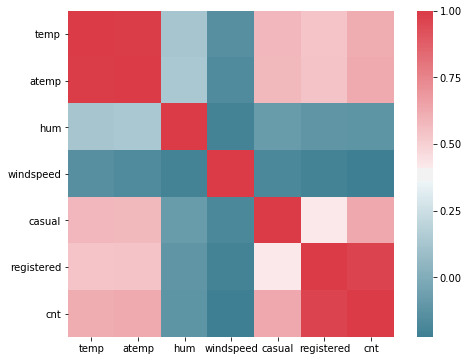

In [24]:
#feature selection

#correlation analysis for numeric variables

num_cols = ['temp','atemp','hum','windspeed','casual','registered','cnt']

df_continuous = data1.loc[:,num_cols]

#df_continuous

f,ax = plt.subplots(figsize=(8,6))

correlation = df_continuous.corr()

sns.heatmap(correlation,mask=np.zeros_like(correlation,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,robust=True,ax=ax)

In [25]:
#anova test for categorical variables

for i in cat_cols:
    data1[i] = data1[i].astype(int)

X = data1[['season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit','holiday']]
Y = data1['cnt']
ols_res = sm.OLS(Y, X).fit()
#ols_res.summary()
#formula = 'cnt ~ C(season).C(yr).C(mnth).C(holiday).C(weekday).C(workingday).C(weathersit)'
#model = ols('cnt ~ C(season)+C(yr)+C(mnth)+C(holiday)+C(weekday)+C(workingday)+C(weathersit)', data=data1).fit()
#model = ols(formula, data=data1).fit()   # throwing error as "model is missing required outcome variables"
#aov_table = anova_lm(model.fit(), typ=2)


In [26]:
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     1293.
Date:                Wed, 26 Dec 2018   Prob (F-statistic):               0.00
Time:                        04:22:12   Log-Likelihood:                -6274.6
No. Observations:                 731   AIC:                         1.256e+04
Df Residuals:                     724   BIC:                         1.260e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season      1192.0253     74.207     16.064      0.000    1046.339    1337.711
yr          2280.6768     92.722     24.597      0.000    2098.640    2462.713
mnth         -84.2795     25.140     -3.352      0.001    -133.636     -34.923
weekday      151.3353     22.654      6.680      0.000     106.860     195.811
workingday  1033.3444    101.069     10.224      0.000     834.922    1231.767
weathersit  -347.1882     72.087     -4.816      0.000    -488.713    -205.664
holiday      106.4828    294.237      0.362      0.718    -471.176     684.142
==============================================================================
Omnibus:                       42.161   Durbin-Watson:                   0.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.263
Skew:                          -0.449   Prob(JB):                     6.74e-15
Kurtosis:                       4.155   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
rp.summary_cont(data1['hum'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,hum,731.0,0.629359,0.139566,0.005162,0.619225,0.639493


In [28]:
#from correlation and OLS tests, we drop "holiday" and "atemp" since p-value for "holiday" is 0.718>0.005 hence null hypothesis
#becomes true and for "atemp", it is multicollinear with "temp"

data1 = data1.drop(['atemp','holiday'], axis=1)

In [29]:
#data1.head()

In [30]:
data1.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,1,6,0,2,0.344167,0.805833,0.160446,331.0,654.0,985
1,1,0,1,0,0,2,0.363478,0.696087,0.248539,131.0,670.0,801
2,1,0,1,1,1,1,0.196364,0.437273,0.248309,120.0,1229.0,1349
3,1,0,1,2,1,1,0.200000,0.590435,0.160296,108.0,1454.0,1562
4,1,0,1,3,1,1,0.226957,0.436957,0.186900,82.0,1518.0,1600


In [31]:
#normalizing variables

for i in range(0, len(data1['casual'])):
    data1['casual'][i] = (data1['casual'][i] - min(data1['casual']))/(max(data1['casual']) - min(data1['casual']))
    data1['registered'][i] = (data1['registered'][i] - min(data1['registered']))/(max(data1['registered']) - min(data1['registered']))

C:\Users\SAYAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\SAYAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [32]:
data1['cnt'] = data1['casual'] + data1['registered']

In [33]:
#data1.head()

In [34]:
data_preprocessed = data1

In [35]:
data_preprocessed.head(10)

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,0,1,6,0,2,0.344167,0.805833,0.160446,0.145833,0.091539,0.237372
1,1,0,1,0,0,2,0.363478,0.696087,0.248539,0.057955,0.096446,0.154402
2,1,0,1,1,1,1,0.196364,0.437273,0.248309,0.053120,0.176926,0.230046
3,1,0,1,2,1,1,0.200000,0.590435,0.160296,0.047808,0.209319,0.257126
4,1,0,1,3,1,1,0.226957,0.436957,0.186900,0.036295,0.218533,0.254828
5,1,0,1,4,1,1,0.204348,0.518261,0.089565,0.038957,0.218533,0.257490
6,1,0,1,5,1,2,0.196522,0.498696,0.168726,0.065530,0.196073,0.261603
7,1,0,1,6,0,2,0.165000,0.535833,0.266804,0.030100,0.128264,0.158363
8,1,0,1,0,0,1,0.138333,0.434167,0.361950,0.023902,0.110556,0.134457
9,1,0,1,1,1,1,0.150833,0.482917,0.223267,0.018147,0.184268,0.202415


Text(0.5,0,'Season')

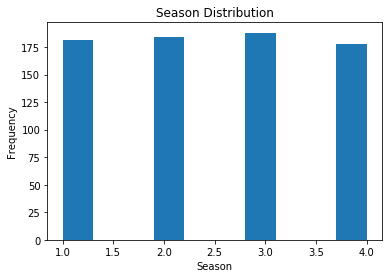

In [36]:
#check variable distribution

data_preprocessed['season'].plot(kind= "hist", title= "Season Distribution")
plt.xlabel("Season")

Text(0.5,0,'Year')

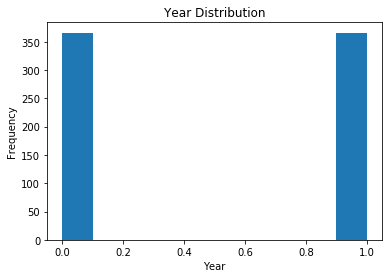

In [37]:
data_preprocessed['yr'].plot(kind= "hist", title= "Year Distribution")
plt.xlabel("Year")


Text(0.5,0,'Month')

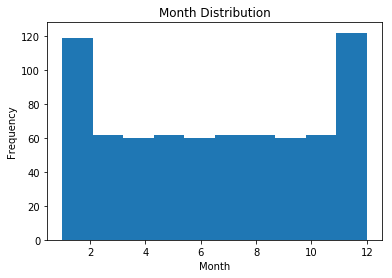

In [38]:
data_preprocessed['mnth'].plot(kind= "hist", title= "Month Distribution")
plt.xlabel("Month")

Text(0.5,0,'Weekday')

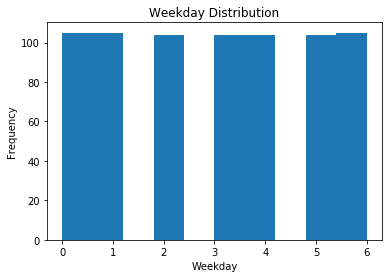

In [39]:
data_preprocessed['weekday'].plot(kind= "hist", title= "Weekday Distribution")
plt.xlabel("Weekday")

Text(0.5,0,'Working Day')

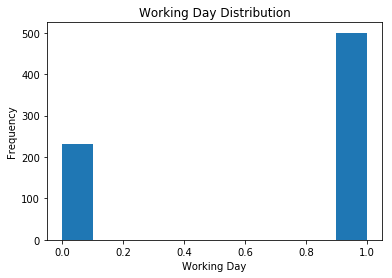

In [40]:
data_preprocessed['workingday'].plot(kind= "hist", title= "Working Day Distribution")
plt.xlabel("Working Day")

Text(0.5,0,'Weathersit')

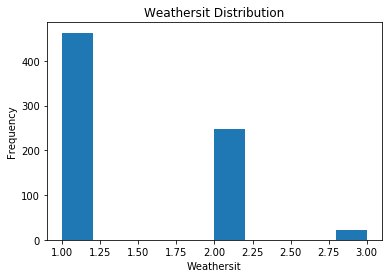

In [41]:
data_preprocessed['weathersit'].plot(kind= "hist", title= "Weathersit Distribution")
plt.xlabel("Weathersit")

Text(0.5,0,'Temperature')

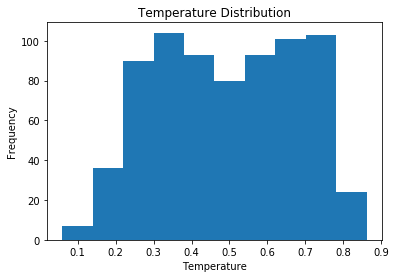

In [42]:
data_preprocessed['temp'].plot(kind= "hist", title= "Temperature Distribution")
plt.xlabel("Temperature")

Text(0.5,0,'Humidity')

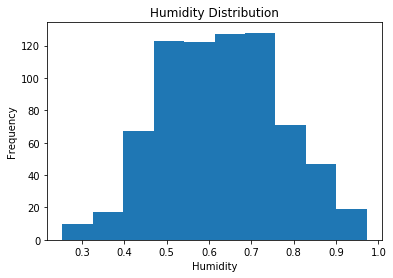

In [43]:
data_preprocessed['hum'].plot(kind= "hist", title= "Humidity Distribution")
plt.xlabel("Humidity")

Text(0.5,0,'Windspeed')

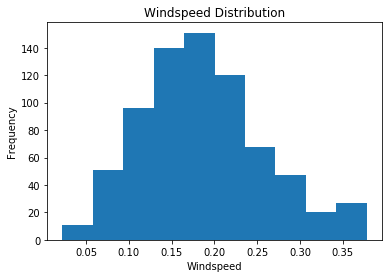

In [44]:
data_preprocessed['windspeed'].plot(kind= "hist", title= "Windspeed Distribution")
plt.xlabel("Windspeed")

Text(0.5,0,'Casual Counts')

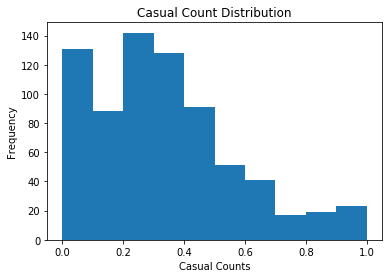

In [45]:
data_preprocessed['casual'].plot(kind= "hist", title= "Casual Count Distribution")
plt.xlabel("Casual Counts")

Text(0.5,0,'Registered Counts')

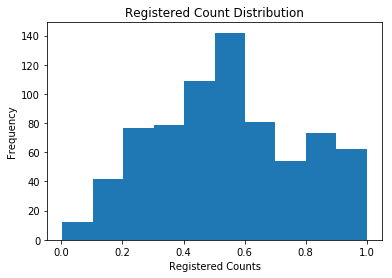

In [46]:
data_preprocessed['registered'].plot(kind= "hist", title= "Registered Count Distribution")
plt.xlabel("Registered Counts")

In [47]:
#check skewness of numeric variables in pre-processed data

print(3*(np.mean(data_preprocessed['temp']) - np.median(data_preprocessed['temp']))/np.std(data_preprocessed['temp']))

print(3*(np.mean(data_preprocessed['windspeed']) - np.median(data_preprocessed['windspeed']))/np.std(data_preprocessed['windspeed']))

print(3*(np.mean(data_preprocessed['hum']) - np.median(data_preprocessed['hum']))/np.std(data_preprocessed['hum']))

print(3*(np.mean(data_preprocessed['casual']) - np.median(data_preprocessed['casual']))/np.std(data_preprocessed['casual']))

print(3*(np.mean(data_preprocessed['registered']) - np.median(data_preprocessed['registered']))/np.std(data_preprocessed['registered']))

-0.048350954416681136
0.22855595352559643
0.004127900284817284
0.483993040464182
0.11240949043014128


In [48]:
#We see from distribution and skewness that the variable "casual" is moderately skewed to the right. Thus to handle it,
#we are taking the square root of this variable, in order to make the variable distribution closer to normal.

data_preprocessed['casual'] = np.sqrt(data_preprocessed['casual'])

data_preprocessed['cnt'] = data_preprocessed['casual'] + data_preprocessed['registered']

Text(0.5,0,'Casual Counts')

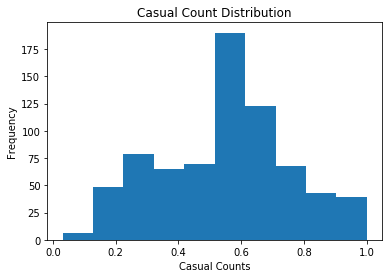

In [49]:
#verify normal distribution in "casual" variable

data_preprocessed['casual'].plot(kind= "hist", title= "Casual Count Distribution")
plt.xlabel("Casual Counts")

In [50]:
#perform K-fold cross-validation

train_data, test_data = train_test_split(data_preprocessed, test_size=0.20)
#kf = KFold(n_splits=10,random_state=None)
#kf.get_n_splits(X)
#print(kf)
#print(train_data.shape, test_data.shape)

Cross-validated scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cross-validated R-squared: 1.0


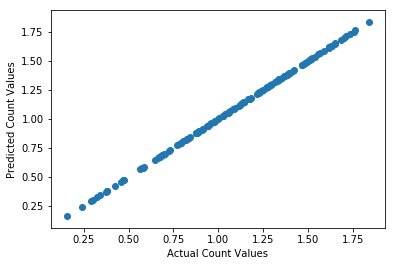

In [51]:
#designing Linear Regression model

lm = linear_model.LinearRegression()
model_lm = lm.fit(train_data,train_data['cnt'])
predictions_lm = lm.predict(test_data)
#predictions_lm[0:10]

#plotting predictions

plt.scatter(test_data['cnt'],predictions_lm)
plt.xlabel("Actual Count Values")
plt.ylabel("Predicted Count Values")

#calculate model accuracy

model_lm.score(test_data,test_data['cnt'])

#performing cross-validation and predicting test data

scores = cross_val_score(model_lm, data_preprocessed, data_preprocessed['cnt'], cv=10)  # 10-fold cross-validation
print ("Cross-validated scores:", scores)

#calculating R-squared value

accuracy = metrics.r2_score(test_data['cnt'], predictions_lm)
print("Cross-validated R-squared:", accuracy)

In [55]:
model_lm.coef_

array([-2.26243061e-16, -2.15105711e-16,  6.93889390e-17, -2.14170587e-16,
       -2.25764774e-16, -1.05519976e-16,  6.78710560e-16,  4.44848151e-16,
        2.81350464e-17,  3.33333333e-01,  3.33333333e-01,  6.66666667e-01])

In [56]:
model_lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
reg_coefficients = pd.DataFrame({"Columns":data_preprocessed.columns, "Estimators":model_lm.coef_})
reg_coefficients

,Columns,Estimators
0,season,-2.262431e-16
1,yr,-2.151057e-16
2,mnth,6.938894e-17
3,weekday,-2.141706e-16
4,workingday,-2.257648e-16
5,weathersit,-1.055200e-16
6,temp,6.787106e-16
7,hum,4.448482e-16
8,windspeed,2.813505e-17
9,casual,3.333333e-01


In [58]:
#Random Forest in Python

#data_preprocessed.describe()
#pd.get_dummies(data['mnth']) # one-hot encoding

model_rf = RandomForestRegressor(n_estimators = 500, random_state = 42)

In [59]:
# Train the model on training data
model_rf.fit(train_data,train_data['cnt']);

# Use the forest's predict method on the test data
predictions_rf = model_rf.predict(test_data)

In [60]:
# Calculate the absolute errors
errors = abs(predictions_rf - test_data['cnt'])
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.0 degrees.


In [61]:
#calculate MAPE and accuracy
mape = 100 * (errors / test_data['cnt'])
accuracy = 100 - np.mean(mape)
accuracy

99.59573105657232

In [62]:
#check with cross-validation

scores_rf = cross_val_score(model_rf, data_preprocessed, data_preprocessed['cnt'], cv=10)  # 10-fold cross-validation
print ("Cross-validated scores:", scores_rf)

Cross-validated scores: [0.98053015 0.99992039 0.99986043 0.9999264  0.99923961 0.99978774
 0.99995894 0.99965724 0.99884683 0.98078067]


In [63]:
scores_rf.sort()

In [64]:
scores_rf

#We see that maximum accuracy attained by 10-fold cross-validation is 99.995854%, at the 10th fold.

array([0.98053015, 0.98078067, 0.99884683, 0.99923961, 0.99965724,
       0.99978774, 0.99986043, 0.99992039, 0.9999264 , 0.99995894])